**Regression with an Insurance Dataset**

This notebook is a starter notebook for understanding and applying the knowledge around Statistics, Data Manipulations and Machine Learning fundamentals.

I will cover most of the things in this notebook, starting from the basics like steps you need to take when you first read the data in the environment.

Also, this notebook will cover most of the Python syntax (Pandas, NumPy, matplotlib, etc.) Be sure to look out for that too.

[Link to Source](https://www.kaggle.com/competitions/playground-series-s4e12/overview)

First, let's setup the drive for accessing the data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%ls
%cd drive/MyDrive/insurance-regression-kaggle/data

drive/  sample_data/
/content/drive/MyDrive/insurance-regression-kaggle/data


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.6f}'.format

In [4]:
raw_train = pd.read_csv("train.csv")

The first thing we look at is the dimension of the dataset. This gives us information on how much data we have to handle.

Below is the information about the data variables.

**Features**


*   **Age**: Age of the insured individual
*   **Gender**: Gender of the insured individual
*   **Annual Income**: Annual income of the insured individual
*   **Marital Status**: Marital status of the insured individual
*   **Number of Dependents**: Number of dependents
*   **Education Level**: Highest education level attained
*   **Occupation**: Occupation of the insured individual
*   **Health Score**: A score representing the health status
*   **Location**: Type of location
*   **Policy Type**: Type of insurance policy
*   **Previous Claims**: Number of previous claims made
*   **Vehicle Age**: Age of the vehicle insured
*   **Credit Score**: Credit score of the insured individual
*   **Insurance Duration**: Duration of the insurance policy
*   **Premium Amount**: Target variable representing the insurance premium amount
*   **Policy Start Date**: Start date of the insurance policy
*   **Customer Feedback**: Short feedback comments from customers
*   **Smoking Status**: Smoking status of the insured individual
*   **Exercise Frequency**: Frequency of exercise
*   **Property Type**: Type of property owned

First handle the column naming.

In [27]:
# remove white space
raw_train.columns = raw_train.columns.str.replace(" ", "_")

# lower case
raw_train.columns = raw_train.columns.str.lower()

In [28]:
print(raw_train.shape)

(1200000, 21)


In [29]:
raw_train.head()

,id,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,...,previous_claims,vehicle_age,credit_score,insurance_duration,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,premium_amount
0,0,19.000000,Female,10049.000000,Married,1.000000,Bachelor's,Self-Employed,22.598761,Urban,...,2.000000,17.000000,372.000000,5.000000,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.000000
1,1,39.000000,Female,31678.000000,Divorced,3.000000,Master's,NaN,15.569731,Rural,...,1.000000,12.000000,694.000000,2.000000,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.000000
2,2,23.000000,Male,25602.000000,Divorced,3.000000,High School,Self-Employed,47.177549,Suburban,...,1.000000,14.000000,NaN,3.000000,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.000000
3,3,21.000000,Male,141855.000000,Married,2.000000,Bachelor's,NaN,10.938144,Rural,...,1.000000,0.000000,367.000000,1.000000,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.000000
4,4,21.000000,Male,39651.000000,Single,1.000000,Bachelor's,Self-Employed,20.376094,Rural,...,0.000000,8.000000,598.000000,4.000000,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.000000


Null value check

In [30]:
raw_train.isna().sum()

,0
id,0
age,18705
gender,0
annual_income,44949
marital_status,18529
number_of_dependents,109672
education_level,0
occupation,358075
health_score,74076
location,0


Data types

In [31]:
raw_train.dtypes

,0
id,int64
age,float64
gender,object
annual_income,float64
marital_status,object
number_of_dependents,float64
education_level,object
occupation,object
health_score,float64
location,object


In [32]:
raw_train.describe()

,id,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
count,1200000.000000,1181295.000000,1155051.000000,1090328.000000,1125924.000000,835971.000000,1199994.000000,1062118.000000,1199999.000000,1200000.000000
mean,599999.500000,41.145563,32745.217777,2.009934,25.613908,1.002689,9.569889,592.924350,5.018219,1102.544822
std,346410.305852,13.539950,32179.506124,1.417338,12.203462,0.982840,5.776189,149.981945,2.594331,864.998859
min,0.000000,18.000000,1.000000,0.000000,2.012237,0.000000,0.000000,300.000000,1.000000,20.000000
25%,299999.750000,30.000000,8001.000000,1.000000,15.918959,0.000000,5.000000,468.000000,3.000000,514.000000
50%,599999.500000,41.000000,23911.000000,2.000000,24.578648,1.000000,10.000000,595.000000,5.000000,872.000000
75%,899999.250000,53.000000,44634.000000,3.000000,34.527209,2.000000,15.000000,721.000000,7.000000,1509.000000
max,1199999.000000,64.000000,149997.000000,4.000000,58.975914,9.000000,19.000000,849.000000,9.000000,4999.000000


Visualize target variable distribution

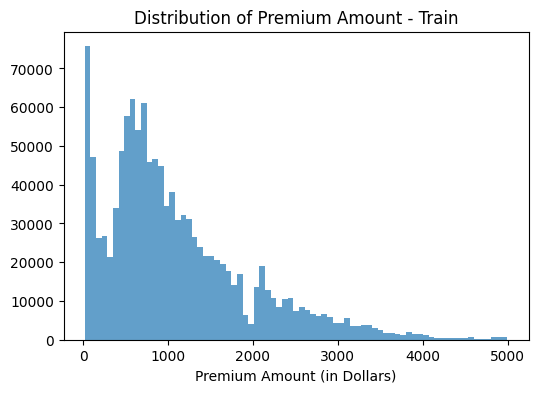

In [45]:
plt.figure(figsize=(6, 4))
plt.hist(raw_train.premium_amount, bins=75, alpha=0.7)
plt.title("Distribution of Premium Amount - Train")
plt.xlabel("Premium Amount (in Dollars)")
plt.show()